In [1]:
import lightgbm as lgb

In [2]:
import xgboost

In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [4]:
#importing the data file
df= pd.read_csv('Data_for_UCI_named.csv')

In [5]:
#viewing the data
df.head(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [6]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
#checking for value counts of the target varibale column
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [8]:
#checking for missing values
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [9]:
#dropping the stab column
df.drop('stab',axis=1,inplace = True)

In [10]:
#replacing values in the stab dataframe
df.replace({'stabf':{'stable':0,'unstable':1}},inplace=True)

In [11]:
#creating X and y variables for training
X = df.drop(columns= 'stabf' )
y = df[ 'stabf' ] 

In [12]:
#Splitting the datset into train  and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 1 )

In [13]:
#Using the standard scaler to transform the train set (x_train, y_train) and the test set (x_test)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
#Using random forest
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [15]:
# make prediction on feature test
y_pred1 = rf_clf.predict(x_test)
y_pred1

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [16]:
#using ExtraTreeClassifier
e_clf = ExtraTreesClassifier(random_state=1)
e_clf.fit(x_train, y_train)

ExtraTreesClassifier(random_state=1)

In [17]:
y_pred2 = e_clf.predict(x_test)
y_pred2

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [18]:
#Using xgboost
xg_clf = XGBClassifier(random_state =1)
xg_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [19]:
y_pred3 = xg_clf.predict(x_test)
y_pred3

array([1, 1, 0, ..., 0, 1, 1])

In [20]:
#using lightgbm
lg_clf = LGBMClassifier(random_state=1)
lg_clf.fit(x_train,y_train)

LGBMClassifier(random_state=1)

In [21]:
y_pred4 = xg_clf.predict(x_test)
y_pred4

array([1, 1, 0, ..., 0, 1, 1])

In [26]:
#14
accuracy = accuracy_score(y_true=y_test,y_pred =y_pred1)
print('Accuracy of Random forest:',round(accuracy,4))

Accuracy of Random forest: 0.929


In [29]:
#15
accuracy = accuracy_score(y_true=y_test,y_pred =y_pred3)
print('Accuracy of XGBOOST:',round(accuracy,4))

Accuracy of XGBOOST: 0.9455


In [30]:
#16
accuracy = accuracy_score(y_true=y_test,y_pred =y_pred4)
print('Accuracy og lightgbm:',round(accuracy,4))

Accuracy og lightgbm: 0.9455


In [34]:
#18
e_clf = ExtraTreesClassifier(n_estimators=300,min_samples_split=5,min_samples_leaf=6,max_features='auto',random_state=1)
e_clf.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ExtraTreesClassifier(max_features='auto', min_samples_leaf=6,
                     min_samples_split=5, n_estimators=300, random_state=1)

In [35]:
y_pred5 = e_clf.predict(x_test)
y_pred5

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [37]:
accuracy = accuracy_score(y_true=y_test,y_pred =y_pred2)
print('Accuracy of Extra tree classifier:',round(accuracy,4))

Accuracy of Extra tree classifier: 0.928


In [36]:
accuracy = accuracy_score(y_true=y_test,y_pred =y_pred5)
print('Accuracy of new extra tree classifier:',round(accuracy,4))

Accuracy of new extra tree classifier: 0.921


In [39]:
extra_tree_forest = e_clf

In [40]:
extra_tree_forest.fit(X,y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ExtraTreesClassifier(max_features='auto', min_samples_leaf=6,
                     min_samples_split=5, n_estimators=300, random_state=1)

In [41]:
#creating a a feature importance
feature_importance = extra_tree_forest.feature_importances_

In [43]:
#normalizing 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_],axis=0)

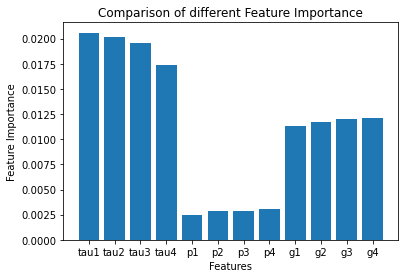

In [46]:
#20
plt.bar(X.columns,feature_importance_normalized)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Comparison of different Feature Importance')
plt.show()